# Star Wars Fans (2014)

This data contains 835 responses from an online survey via SurveyMonkey collected in 2014 by FiveThirtyEight to answer questions regarding which Star Wars movies people liked the best and to assess how many people would call themselves a fan of the Star Wars Franchise.  This code cleans up the data and computes some basic statistics.  The results of this survey should be viewed with caution due to the selective nature of online surveys.  The direction of the bias depends on how highly correlated being a fan of the Star Wars Franchise is with income and educational characteristics.

In [42]:
#Importing and examining the data
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head()
star_wars.columns
star_wars.shape
star_wars = star_wars[star_wars["RespondentID"].notnull()]
print(star_wars.shape)
#only one row was dropped

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

(1187, 38)

(1186, 38)


In [43]:
#Cleaning up yes/no columns to turn into boolean functions
yes_no = {"Yes": True, "No": False}
qs1 = "Have you seen any of the 6 films in the Star Wars franchise?"
qs2 = "Do you consider yourself to be a fan of the Star Wars film franchise?"
star_wars[qs1] = star_wars[qs1].map(yes_no)
star_wars[qs2] = star_wars[qs2].map(yes_no)
print(star_wars[qs1].head())
print(star_wars[qs2].head())

1     True
2    False
3     True
4     True
5     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: bool
1     True
2      NaN
3    False
4     True
5     True
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: object


In [44]:
#Cleaning up Checkbox Columns
cols = ["Which of the following Star Wars films have you seen? Please select all that apply.",
       "Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8"]

yes_no_cols = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    "NaN": False
}

renamecols = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "Episode I  The Phantom Menace",
    "Unnamed: 4" : "Episode II  Attack of the Clones",
    "Unnamed: 5" : "Episode III Revenge of the Sith",
    "Unnamed: 6" : "Episode IV A New Hope",
    "Unnamed: 7" : "Episode V The Empire Strikes Back",
    "Unnamed: 8" : "Episode VI Return of the Jedi"
}
for c in cols:
    star_wars[c]=star_wars[c].map(yes_no_cols)
    star_wars[c]=(star_wars[c] == True)

print(star_wars[cols].head())
star_wars = star_wars.rename(columns = renamecols)
print(star_wars.columns)

  Which of the following Star Wars films have you seen? Please select all that apply.  \
1                                               True                                    
2                                              False                                    
3                                               True                                    
4                                               True                                    
5                                               True                                    

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  
1       True       True       True       True       True  
2      False      False      False      False      False  
3       True       True      False      False      False  
4       True       True       True       True       True  
5       True       True       True       True       True  
Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you co

In [45]:
#converts columns from 9 up to 14 into a float value
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
new_names = {
            'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': "Ranking 1",
             'Unnamed: 10': "Ranking 2", 
             'Unnamed: 11': "Ranking 3",
             'Unnamed: 12': "Ranking 4",
             'Unnamed: 13': "Ranking 5", 
             'Unnamed: 14': "Ranking 6"
            }
star_wars = star_wars.rename(columns = new_names)
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Episode I  The Phantom Menace', 'Episode II  Attack of the Clones',
       'Episode III Revenge of the Sith', 'Episode IV A New Hope',
       'Episode V The Empire Strikes Back', 'Episode VI Return of the Jedi',
       'Ranking 1', 'Ranking 2', 'Ranking 3', 'Ranking 4', 'Ranking 5',
       'Ranking 6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       

In [33]:
#Finding the highest ranked movie 
%matplotlib inline

ranking = ["Ranking 1","Ranking 2","Ranking 3","Ranking 4","Ranking 5","Ranking 6"]
mean_rank = {}
for i in ranking:
    mean_rank[i]=round(star_wars[i].mean(),2)
print(mean_rank)

{'Ranking 1': 3.73, 'Ranking 2': 4.09, 'Ranking 3': 4.34, 'Ranking 4': 3.27, 'Ranking 5': 2.51, 'Ranking 6': 3.05}


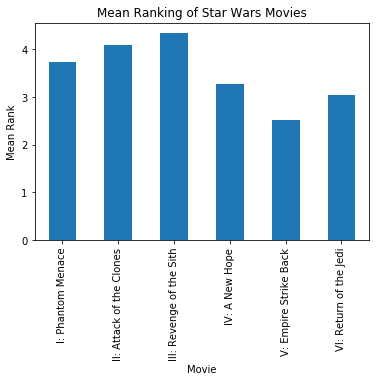

In [46]:
import numpy as np
import matplotlib.pyplot as plt

movies = ["I: Phantom Menace", "II: Attack of the Clones", "III: Revenge of the Sith", "IV: A New Hope", "V: Empire Strike Back", "VI: Return of the Jedi"]

bargraph = star_wars[ranking].mean().plot.bar()
bargraph.set_title("Mean Ranking of Star Wars Movies") 
bargraph.set_xticklabels(movies)
bargraph.set_xlabel("Movie")
bargraph.set_ylabel("Mean Rank")
plt.show()

#### Highest ranked movies

Since a rank of 1 means that people like the movie the most in the series compared to a rank of 6 which means people like it the least the plot shows that more people were enthusiatics abot episodes V and VI compared to episodes I-III in the franchise.

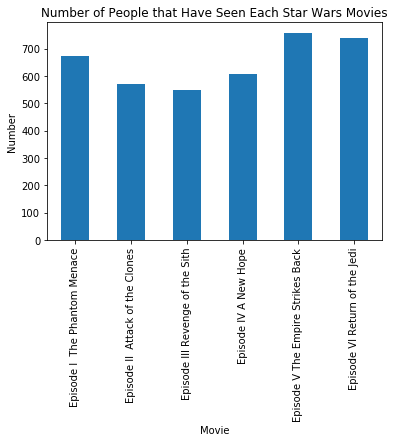

In [47]:
#Finding the most seen movies

bargraph = star_wars[star_wars.columns[3:9]].sum().plot.bar()
bargraph.set_title("Number of People that Have Seen Each Star Wars Movies")
bargraph.set_xlabel("Movie")
bargraph.set_ylabel("Number")


### Number of people seeing Star Wars

The below 

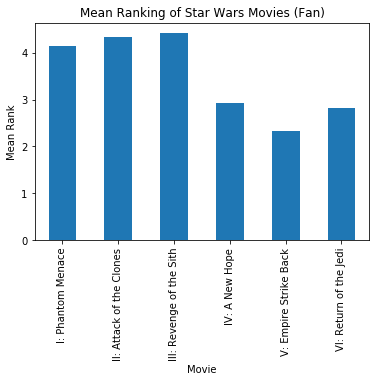

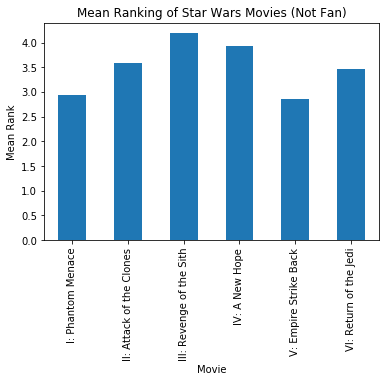

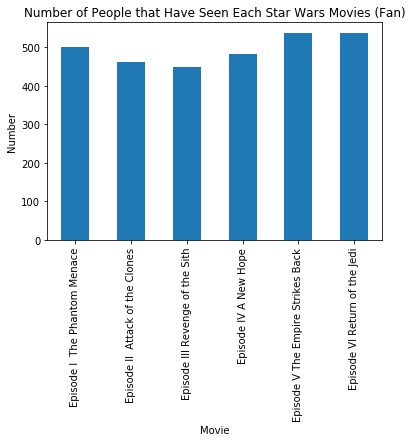

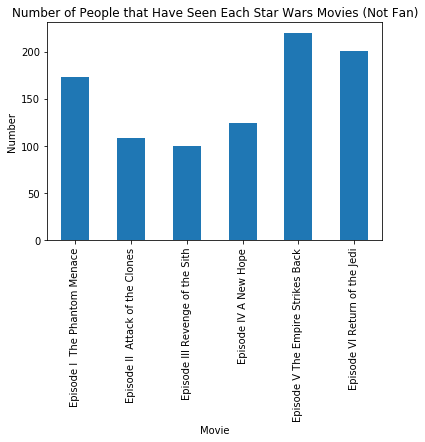

In [49]:
qs = "Do you consider yourself to be a fan of the Star Wars film franchise?"
fan = star_wars[star_wars[qs] == True]
not_fan = star_wars[star_wars[qs] == False]

bargraph = fan[ranking].mean().plot.bar()
bargraph.set_title("Mean Ranking of Star Wars Movies (Fan)")
bargraph.set_xticklabels(movies)
bargraph.set_xlabel("Movie")
bargraph.set_ylabel("Mean Rank")
plt.show()

bargraph = not_fan[ranking].mean().plot.bar()
bargraph.set_title("Mean Ranking of Star Wars Movies (Not Fan)")
bargraph.set_xticklabels(movies)
bargraph.set_xlabel("Movie")
bargraph.set_ylabel("Mean Rank")
plt.show()

bargraph = fan[fan.columns[3:9]].sum().plot.bar()
bargraph.set_title("Number of People that Have Seen Each Star Wars Movies (Fan)")
bargraph.set_xlabel("Movie")
bargraph.set_ylabel("Number")
plt.show()

bargraph = not_fan[not_fan.columns[3:9]].sum().plot.bar()
bargraph.set_title("Number of People that Have Seen Each Star Wars Movies (Not Fan)")
bargraph.set_xlabel("Movie")
bargraph.set_ylabel("Number")
plt.show()

### Splitting Groups into Fans and Not Fans

If we split the groups.  What we find is that people that consider themselves
fans of the star wars franchise are much more likely to rank the episodes IV-VI higher than the later films episodes I-III.  This difference is less park for people that do not consider themselves fans of the franchise.  Moreover fans of the franchise tend to have consistently seen all of the movies while non-fans were more likely to have seen the earlier movies (episodes IV-VI) compared ot the later ones.


In [51]:
#Lets look at how the data compares to the population.  Segment the data by columns like Education, Location (Census)
print(star_wars["Gender"].value_counts())
print(star_wars["Age"].value_counts())
print(star_wars["Household Income"].value_counts())
print(star_wars["Education"].value_counts())
print(star_wars["Location (Census Region)"].value_counts())


Female    549
Male      497
Name: Gender, dtype: int64
45-60    291
> 60     269
30-44    268
18-29    218
Name: Age, dtype: int64
$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: Household Income, dtype: int64
Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64
East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64


#### Analysis of demographic chracteristics

The analysis shows some interesting patters first. A higher proportion of females, older age groups, and more educated people answered the survey.  A disproportionately high share of respondents also come from the higher income groups (as the mean income of the US is < $50,000).

## Conclusions

The demographic distribution of respondents points to the potential problem of using this data to extrapolate to the wider American population set without using a process to correct for the selected sample.  However, of this respondent set it indicates that the earlier movies (episodes IV-VI) were far more popular than the later movies and were also seen by a much larger set of the population whether they were fans or non-fans of the franchise.